In [23]:
import pandas as pd

In [24]:
import numpy as np

In [25]:
import sklearn

In [26]:
# !pip install scikit-surprise

In [27]:
from surprise import Dataset, Reader

In [28]:
import tensorflow as tf

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy
from collections import defaultdict

In [31]:
data = Dataset.load_builtin('ml-100k')

C:\Users\nidhi\AppData\Local\Temp\ipykernel_33492\2168641697.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=raw_ratings, palette='viridis')


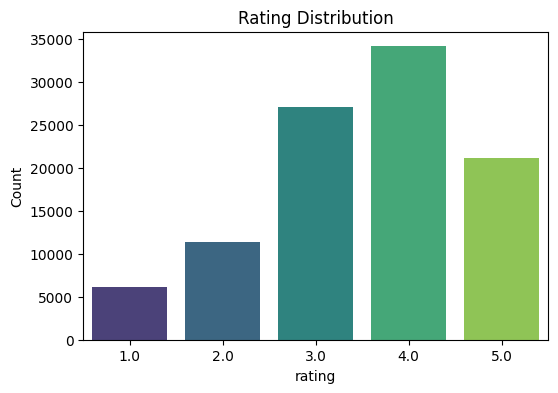

In [32]:
raw_ratings = pd.DataFrame(data.raw_ratings, columns=["user", "item", "rating", "timestamp"])
plt.figure(figsize=(6, 4))
sns.countplot(x='rating', data=raw_ratings, palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

In [33]:
trainset, testset=train_test_split(data, test_size=0.2, random_state=42)

In [34]:
# Training the model

#Building and training the SVD model
model=SVD()
model.fit(trainset)

In [35]:
# predicting on the test data

predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 0.9318
MAE:  0.7352


In [36]:
# # cross-validation for evaluation
# cv_results = cross_validate(model, data, measures=['RMSE, MAE'], cv=5, verbose=False)
# metrics_df = pd.DataFrame(cv_results)

cv_results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
metrics_df = pd.DataFrame(cv_results)

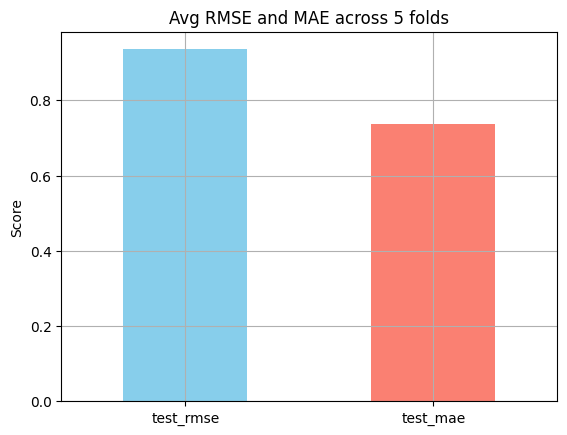

In [37]:
# Plotting avg RMSE and MAE
metrics_df[['test_rmse', 'test_mae']].mean().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Avg RMSE and MAE across 5 folds")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [38]:
print(metrics_df[['test_rmse', 'test_mae']].mean())

test_rmse    0.935719
test_mae     0.737191
dtype: float64


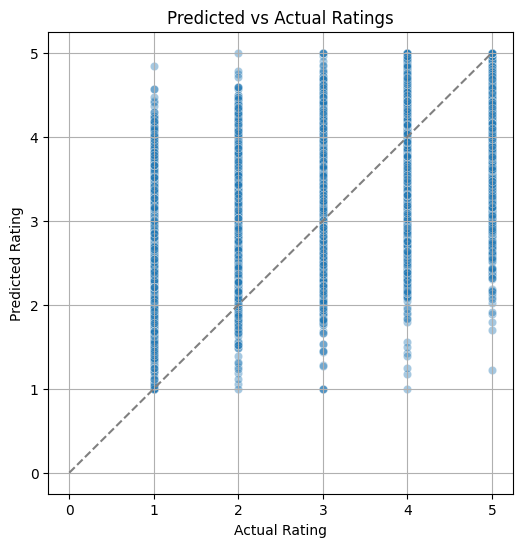

In [39]:
pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
plt.figure(figsize=(6, 6))
sns.scatterplot(x='true_r', y='est', data=pred_df, alpha=0.4)
plt.plot([0, 5], [0, 5], '--', color='gray')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Predicted vs Actual Ratings")
plt.grid(True)
plt.show()

In [40]:
def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

In [41]:
print("Generating top-N recommendations...")
top_n = get_top_n(predictions, n=5)

Generating top-N recommendations...


In [42]:
# Top-5 recommendations for 5 users
print("\nTop-5 Recommendations for First 5 Users:")
for uid, user_ratings in list(top_n.items())[:5]:
    print(f"User {uid}: {[iid for (iid, _) in user_ratings]}")


Top-5 Recommendations for First 5 Users:
User 907: ['173', '813', '1', '647', '98']
User 371: ['210', '186', '175', '97', '55']
User 218: ['12', '654', '42', '209', '789']
User 829: ['408', '190', '124', '170', '129']
User 733: ['14', '515', '13', '922', '762']



Binary Accuracy (Liked vs Disliked): 0.62

Confusion Matrix:
[[8204  700]
 [6953 4143]]

Classification Report:
              precision    recall  f1-score   support

    Disliked       0.54      0.92      0.68      8904
       Liked       0.86      0.37      0.52     11096

    accuracy                           0.62     20000
   macro avg       0.70      0.65      0.60     20000
weighted avg       0.72      0.62      0.59     20000



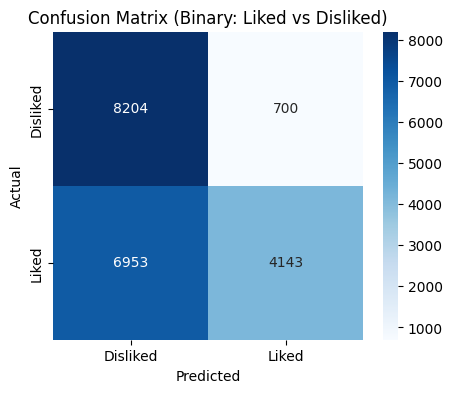

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Converting the  ratings into binary classes (Liked = 1, Disliked = 0)
true_labels = [1 if pred.r_ui >= 4 else 0 for pred in predictions]
pred_labels = [1 if pred.est >= 4 else 0 for pred in predictions]

# Accuracy Score
acc = accuracy_score(true_labels, pred_labels)
print(f"\nBinary Accuracy (Liked vs Disliked): {acc:.2f}")

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(true_labels, pred_labels, target_names=["Disliked", "Liked"])
print("\nClassification Report:")
print(cr)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Disliked", "Liked"], yticklabels=["Disliked", "Liked"])
plt.title("Confusion Matrix (Binary: Liked vs Disliked)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()